<a href="https://colab.research.google.com/github/drusho/data_analysis/blob/main/recent_grads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### __Dataset Orgins__

This dataset focuses on the  job outcomes of students who graduated from college between 2010 and 2012.  The raw csv data comes from FiveThirtyEight's github.  They used this raw data to help write the article: [The Economic Guide to Picking a College Major](https://fivethirtyeight.com/features/the-economic-guide-to-picking-a-college-major/)

In [ ]:
# Import FiveThirtyEight's csv file on recent_grads.
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 26872  100 26872    0     0   166k      0 --:--:-- --:--:-- --:--:--  166k


### __Headers for `recent-grads.csv`:__

Header | Description
---|---------
`Rank` | Rank by median earnings
`Major_code` | Major code, FO1DP in ACS PUMS
`Major` | Major description
`Major_category` | Category of major from Carnevale et al
`Total` | Total number of people with major
`Sample_size` | Sample size (unweighted) of full-time, year-round ONLY (used for earnings)
`Men` | Male graduates
`Women` | Female graduates
`ShareWomen` | Women as share of total
`Employed` | Number employed (ESR == 1 or 2)
`Full_time` | Employed 35 hours or more
`Part_time` | Employed less than 35 hours
`Full_time_year_round` | Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)
`Unemployed` | Number unemployed (ESR == 3)
`Unemployment_rate` | Unemployed / (Unemployed + Employed)
`Median` | Median earnings of full-time, year-round workers
`P25th` | 25th percentile of earnings
`P75th` | 75th percentile of earnings
`College_jobs` | Number with job requiring a college degree
`Non_college_jobs` | Number with job not requiring a college degree
`Low_wage_jobs` | Number in low-wage service jobs

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Run inline visualizations 
%matplotlib inline

df = pd.read_csv("recent-grads.csv")

In [ ]:
# First row of csv file
df.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [ ]:
df.tail(2)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,3154,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,593,237,410,87,0.104946,22000,20000,22000,288,338,192


In [ ]:
df.head(2)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50


In [ ]:
df.info()

#Number of rows for raw data before dropping nan
raw_data_count = len(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [ ]:
df.describe().round()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.0,173.0,172.0,172.0,172.0,172.0,173.0,173.0,173.0,173.0,173.0,173.0,173.0,173.0,173.0,173.0,173.0,173.0,173.0
mean,87.0,3880.0,39370.0,16723.0,22647.0,1.0,356.0,31193.0,26029.0,8832.0,19694.0,2416.0,0.0,40151.0,29501.0,51494.0,12323.0,13284.0,3859.0
std,50.0,1688.0,63483.0,28122.0,41057.0,0.0,618.0,50675.0,42870.0,14648.0,33161.0,4113.0,0.0,11470.0,9166.0,14906.0,21300.0,23790.0,6945.0
min,1.0,1100.0,124.0,119.0,0.0,0.0,2.0,0.0,111.0,0.0,111.0,0.0,0.0,22000.0,18500.0,22000.0,0.0,0.0,0.0
25%,44.0,2403.0,4550.0,2178.0,1778.0,0.0,39.0,3608.0,3154.0,1030.0,2453.0,304.0,0.0,33000.0,24000.0,42000.0,1675.0,1591.0,340.0
50%,87.0,3608.0,15104.0,5434.0,8386.0,1.0,130.0,11797.0,10048.0,3299.0,7413.0,893.0,0.0,36000.0,27000.0,47000.0,4390.0,4595.0,1231.0
75%,130.0,5503.0,38910.0,14631.0,22554.0,1.0,338.0,31433.0,25147.0,9948.0,16891.0,2393.0,0.0,45000.0,33000.0,60000.0,14444.0,11783.0,3466.0
max,173.0,6403.0,393735.0,173809.0,307087.0,1.0,4212.0,307933.0,251540.0,115172.0,199897.0,28169.0,0.0,110000.0,95000.0,125000.0,151643.0,148395.0,48207.0


In [ ]:
df2 = df.dropna()

#Number of Row for cleaned data (dropped nan)
cleaned_data_count = len(df2)

In [ ]:
# Change in number of rows dropped 
raw_data_count - cleaned_data_count

1

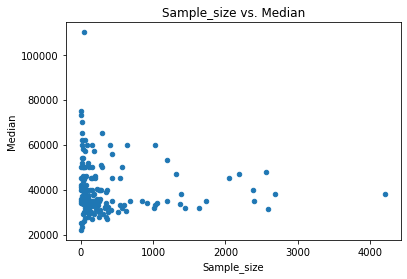

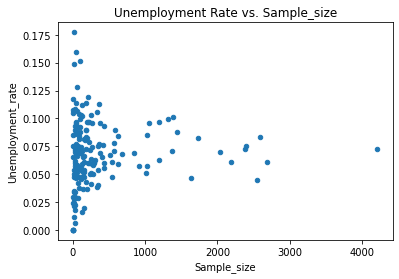

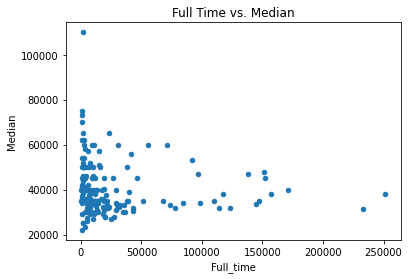

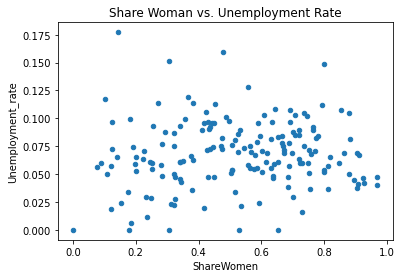

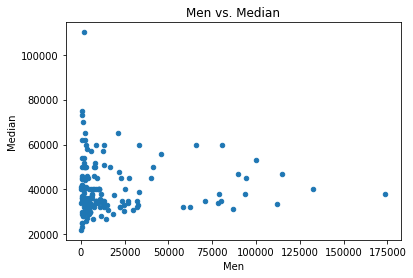

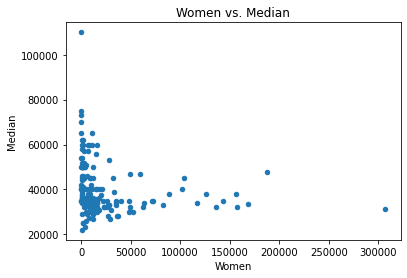

In [ ]:
# Explore correlations using scatter plots
ax = df2.plot(x='Sample_size', y='Median', kind='scatter')
ax.set_title('Sample_size vs. Median')

ax = df2.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')
ax.set_title('Unemployment Rate vs. Sample_size')

ax = df2.plot(x='Full_time', y='Median', kind='scatter')
ax.set_title('Full Time vs. Median')

ax = df2.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')
ax.set_title('Share Woman vs. Unemployment Rate')

ax = df2.plot(x='Men', y='Median', kind='scatter')
ax.set_title('Men vs. Median')

ax = df2.plot(x='Women', y='Median', kind='scatter')
ax.set_title('Women vs. Median')


plt.show()

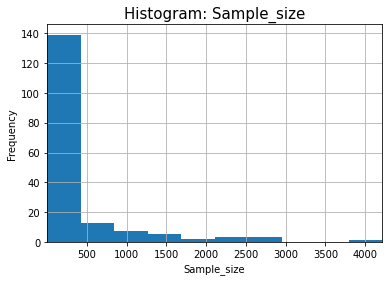

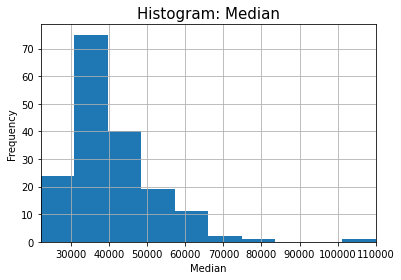

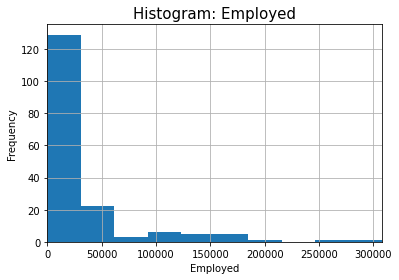

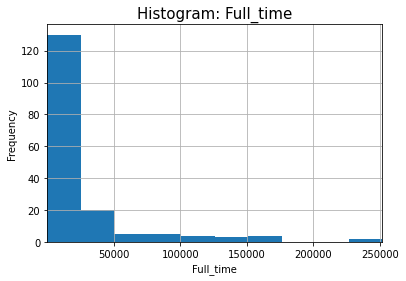

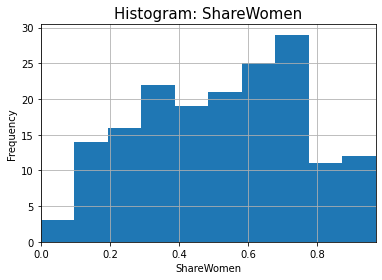

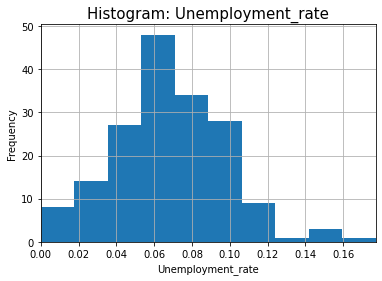

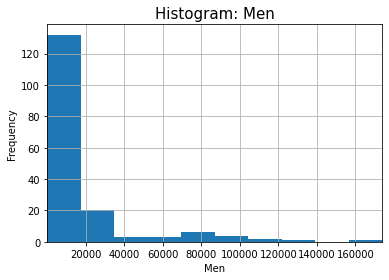

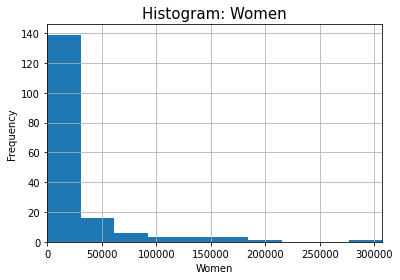

In [ ]:
# df['Sample_size'].plot(kind='hist')

cols =["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

for item in cols:
  plt.margins(x=0)
  df[item].hist()
  plt.title('Histogram: ' + item, fontsize=15)
  plt.ylabel('Frequency')
  plt.xlabel(item)
  plt.show()                        

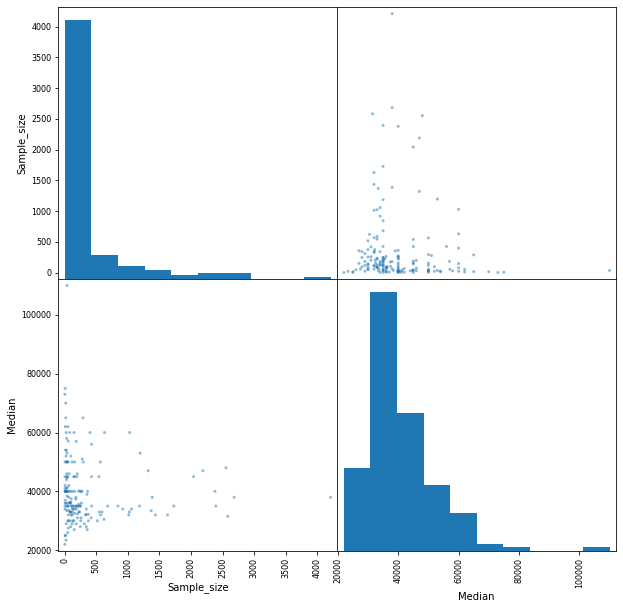

In [ ]:
from pandas.plotting import scatter_matrix 
scatter_matrix(df[['Sample_size','Median']], figsize=(10,10))
plt.show()

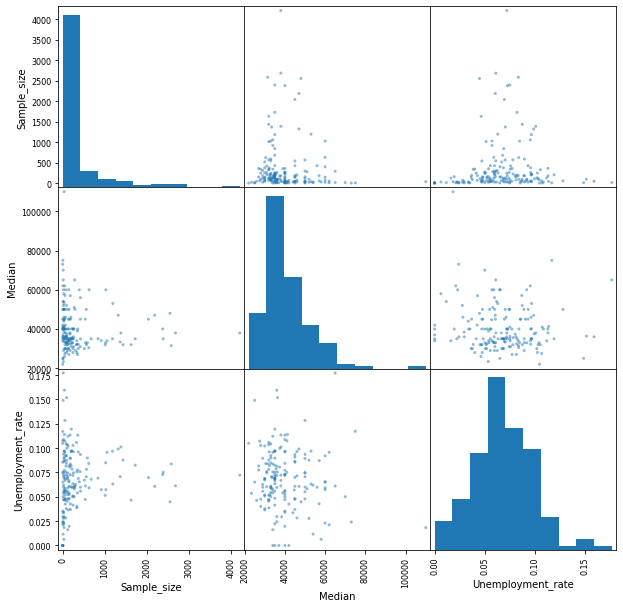

In [ ]:
scatter_matrix(df[['Sample_size','Median','Unemployment_rate']],figsize=(10,10))
plt.show()